# Modèle de régression linéaire selon la technique de la descente de gradient

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

## Je commence par créer un dataset

In [3]:
from sklearn.datasets import make_regression

In [7]:
x, y = make_regression(n_samples=100, n_features=1, noise=10) # On reste sur un dataset simple avec seulement 1 feature. On rajoute un peu de bruit pour que cela semble un peu plus réel.

In [29]:
print(f"x.shape : {x.shape}")
print(f"y.shape : {y.shape}")

# On remarque que les dimensions de notre matrice y ne sont pas bonnes. On corrige cela comme ça : 

y = y.reshape(y.shape[0], 1)
print(f"y.shape après modification : {x.shape}")

x.shape : (100, 1)
y.shape : (100, 1)
y.shape après modification : (100, 1)


Text(0, 0.5, 'target y')

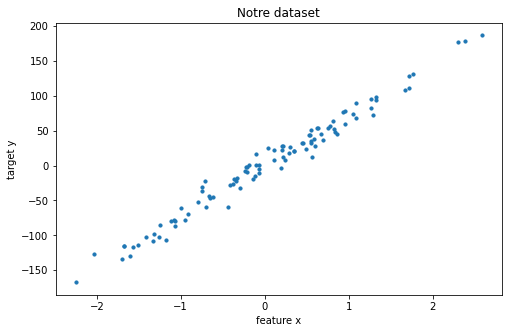

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=10)
plt.title('Notre dataset')
plt.xlabel('feature x')
plt.ylabel('target y')

# Le modèle

#### On souhaite créer un modèle linéaire donc de la forme y = a*x + b. On passe cette formule sous forme matricielle pour faciliter tout les calculs: F = X . theta (produit matriciel de X (matrice x à laquelle on ajoute une colonne de biais) et de theta (matrice qui contient les paramètres de notre modèle qu'il vas falloir ajuster)).

In [13]:
def model(X, theta):
    return X.dot(theta)

In [31]:
X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
print(f"X.shape : {X.shape}, on à bien la colonne de biais qui s'est ajoutée.")

X.shape : (100, 2), on à bien la colonne de biais qui s'est ajoutée.


#### Pour 'initialiser' notre modèle, on créer un theta avec des valeurs aléatoires.

In [35]:
theta = np.random.randn(2,1)
print(f"theta.shape : {theta.shape}, on à bien une matrice à 2 valeurs, ce qui coïncide avec notre modèle à deux paramètres a et b.")

theta.shape : (2, 1), on à bien une matrice à 2 valeurs, ce qui coïncide avec notre modèle à deux paramètres a et b.


In [41]:
prediction = model(X, theta) # On prédit une valeur de y (une target) pour chacun de nos x selon notre modèle.

Text(0, 0.5, 'target y')

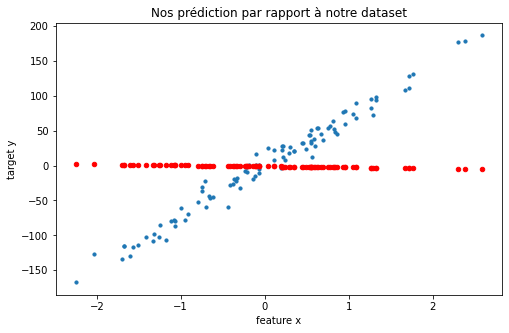

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=10)
plt.scatter(x, prediction, c='r', s=20)
plt.title('Nos prédiction par rapport à notre dataset')
plt.xlabel('feature x')
plt.ylabel('target y')

#### On constate que notre modèle semble très peu performant car il n'entre pas du tout dans le nuage de point de notre dataset.

# La fonction coût (mean squared error)

#### Notre fonction coût est de la forme J(theta) = 1/2m * somme( X . theta - y ) **2

#### Cette fonction représente en fait la différence entre les prédictions de notre modèle et les valeurs vraies. Si on diminu cette fonction coût, on améliore notre modèle.

In [46]:
def mean_squared_error(X, theta, y):
    m = len(X)
    return (1/(2*m)) * ((X.dot(theta) - y)**2).sum()

In [47]:
score = mean_squared_error(X, theta, y)
print(f"Le score de notre modèle est de : {score}, on est très 

2767.471721053506